# setup

In [1]:
import torch
import clip
from PIL import Image

import os
import skimage
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

from sklearn.cluster import KMeans

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# data

In [3]:
name = 'astronaut'

filename = name + '.png'
descriptions = {
    "page": "a page of text about segmentation",
    "chelsea": "a facial photo of a tabby cat",
    "astronaut": "a portrait of an astronaut with the American flag",
    "rocket": "a rocket standing on a launchpad",
    "motorcycle_right": "a red motorcycle standing in a garage",
    "camera": "a person looking at a camera on a tripod",
    "horse": "a black-and-white silhouette of a horse", 
    "coffee": "a cup of coffee on a saucer"
}

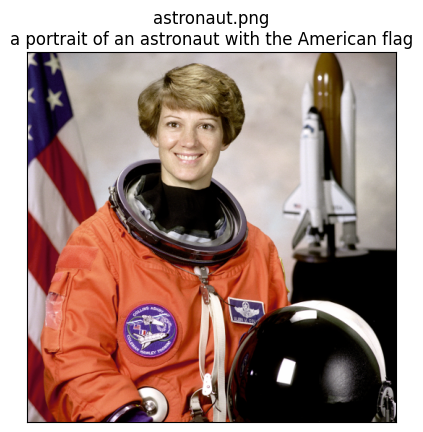

In [4]:
rgb_image = Image.open(os.path.join(skimage.data_dir, filename)).convert("RGB")
plt.imshow(rgb_image);
plt.title(f"{filename}\n{descriptions[name]}");
plt.xticks([]);
plt.yticks([]);

# model

In [5]:
# model, preprocess = clip.load("ViT-B/32", device = device)
model, preprocess = clip.load("RN50", device = device)

In [6]:
image = preprocess(Image.open(os.path.join(skimage.data_dir, filename))).unsqueeze(0).to(device)
text = clip.tokenize([descriptions[name]]).to(device)

# gradcam

In [7]:
target_layers = [model.visual.layer4]
cam = GradCAM(model = model.visual, target_layers = target_layers)

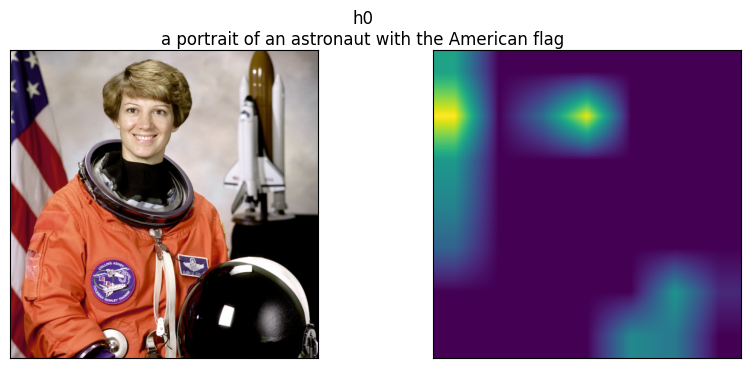

In [8]:
i = 0
grayscale_cam = cam(input_tensor = image, targets = [ClassifierOutputTarget(i)])

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
fig.suptitle(f"h{i}\n{descriptions[name]}")
ax[0].imshow(rgb_image);
ax[0].set_xticks([]);
ax[0].set_yticks([]);

ax[1].imshow(grayscale_cam[0, :, :]);
ax[1].set_xticks([]);
ax[1].set_yticks([]);

# gif

In [9]:
if not os.path.exists('output'):
    os.makedirs('output')

In [14]:
for i in tqdm(range(1024)):
    grayscale_cam = cam(input_tensor = image, targets = [ClassifierOutputTarget(i)])

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
    fig.suptitle(f"h{i}\n{descriptions[name]}")
    ax[0].imshow(rgb_image);
    ax[0].set_xticks([]);
    ax[0].set_yticks([]);

    ax[1].imshow(grayscale_cam[0, :, :]);
    ax[1].set_xticks([]);
    ax[1].set_yticks([]);

    plt.savefig('output/d_h{:03d}'.format(i));
    plt.close()

100%|██████████| 1024/1024 [02:35<00:00,  6.57it/s]
